### Import all required libraries

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split

### Load dataset

Since this dataset is from Kaggle, it will require Kaggle API to able to download 

In [ ]:
# You will  need kaggle api to download the dataset
# you will also need to uncomment and run the following line the first time if you dont have the dataset
#  ! pip install kaggle
# ! mkdir -p ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json



In [ ]:
# ! kaggle datasets download -d shubhambathwal/flight-price-prediction

In [ ]:
# from zipfile import ZipFile
# filename = 'flight-price-prediction.zip'
# with ZipFile(filename, 'r') as zip:
#     zip.extractall()
#     print('Done!')

In [24]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
#dropping the unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# quick information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [54]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [55]:
df.describe(include='all')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [28]:
#  pairwise correlation of 3 columns duration, days left and price
df[['duration', 'days_left', 'price']].corr()


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [29]:
df.shape


(300153, 11)

In [30]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

[Text(0, 0, 'Indigo'),
 Text(1, 0, 'Air_India'),
 Text(2, 0, 'GO_FIRST'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Vistara'),
 Text(5, 0, 'AirAsia')]

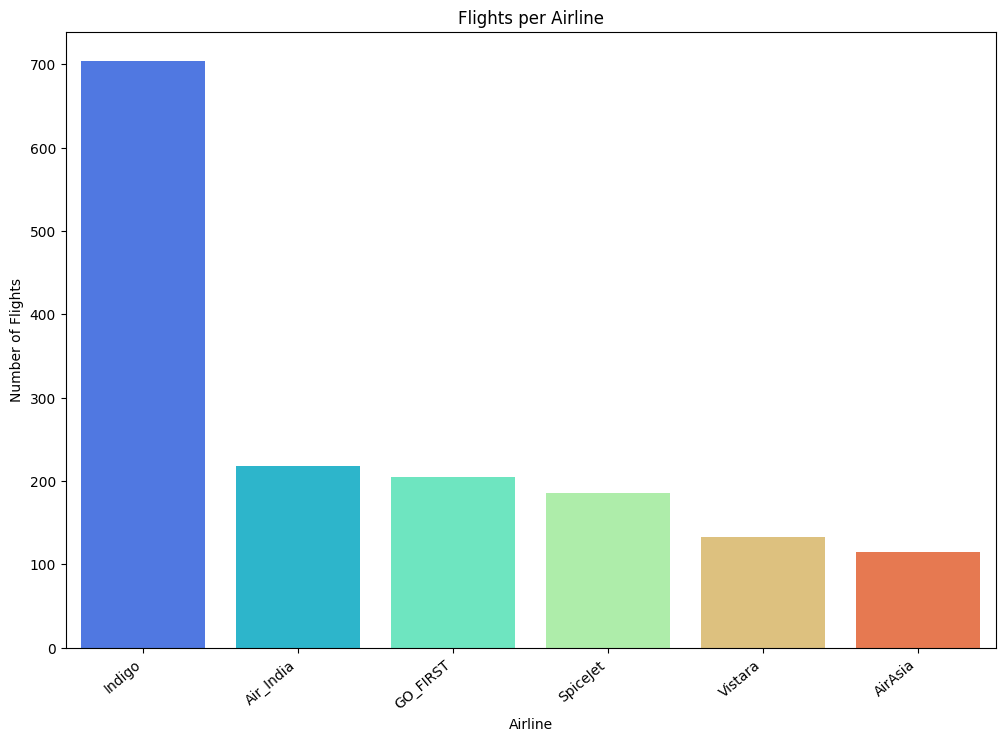

In [47]:
# plot the number of flights per airline
fig, ax = plt.subplots(figsize=(12, 8))
airline_counts = df1.airline.value_counts()
ax = sns.barplot(x=airline_counts.index, y=airline_counts.values, palette='rainbow')

ax.set(xlabel='Airline', 
       ylabel='Number of Flights',
       title='Flights per Airline')
       

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [32]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

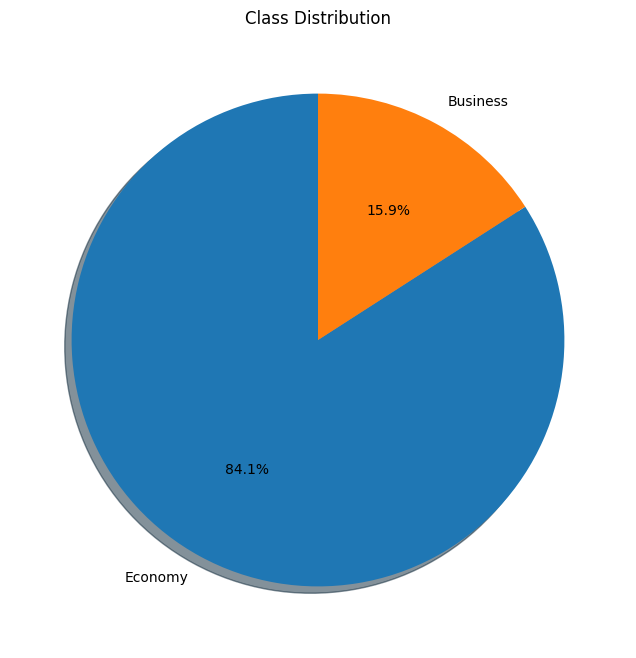

In [48]:
#pie chart for class distribution
data = df2['class'].value_counts()
labels = df2['class'].unique()
plt.figure(figsize=(12,8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Class Distribution')
plt.show()

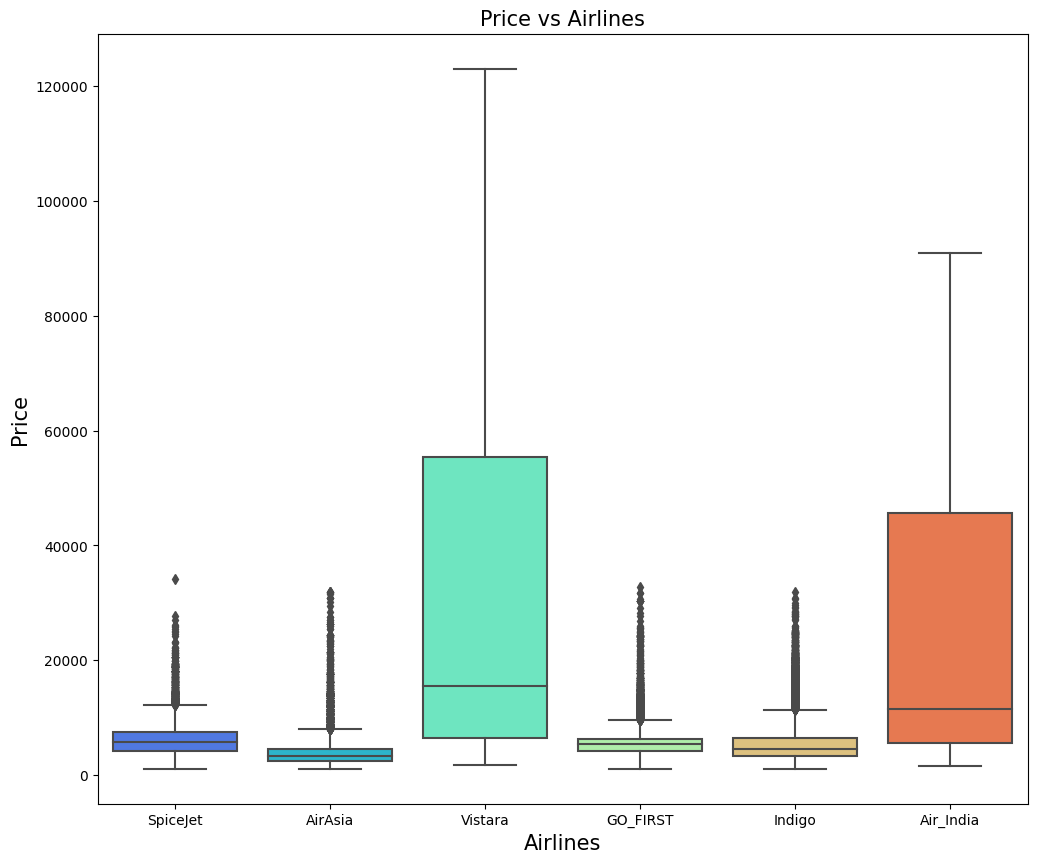

In [50]:
# price vary with different airlines
plt.figure(figsize=(12,10))
sns.boxplot(x='airline',y='price',data=df, palette='rainbow')
plt.title('Price vs Airlines',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

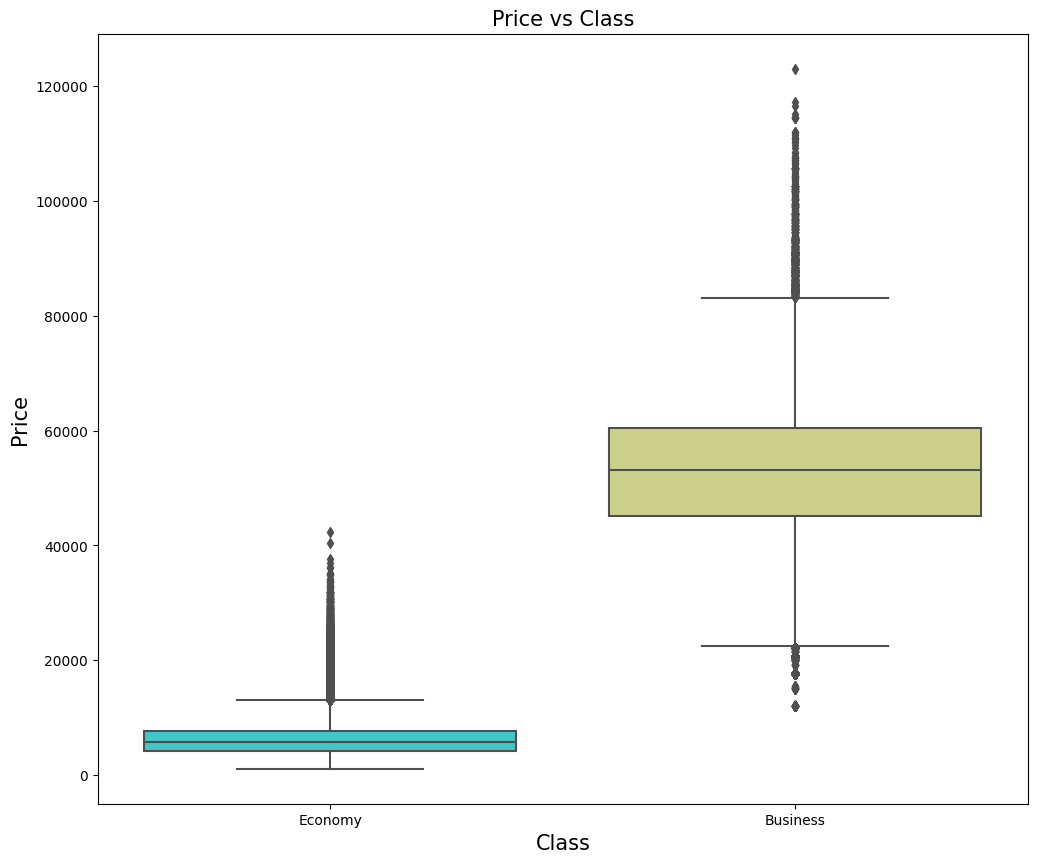

In [51]:
# price vary with different classes
plt.figure(figsize=(12,10))
sns.boxplot(x='class',y='price',data=df, palette='rainbow')
plt.title('Price vs Class',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

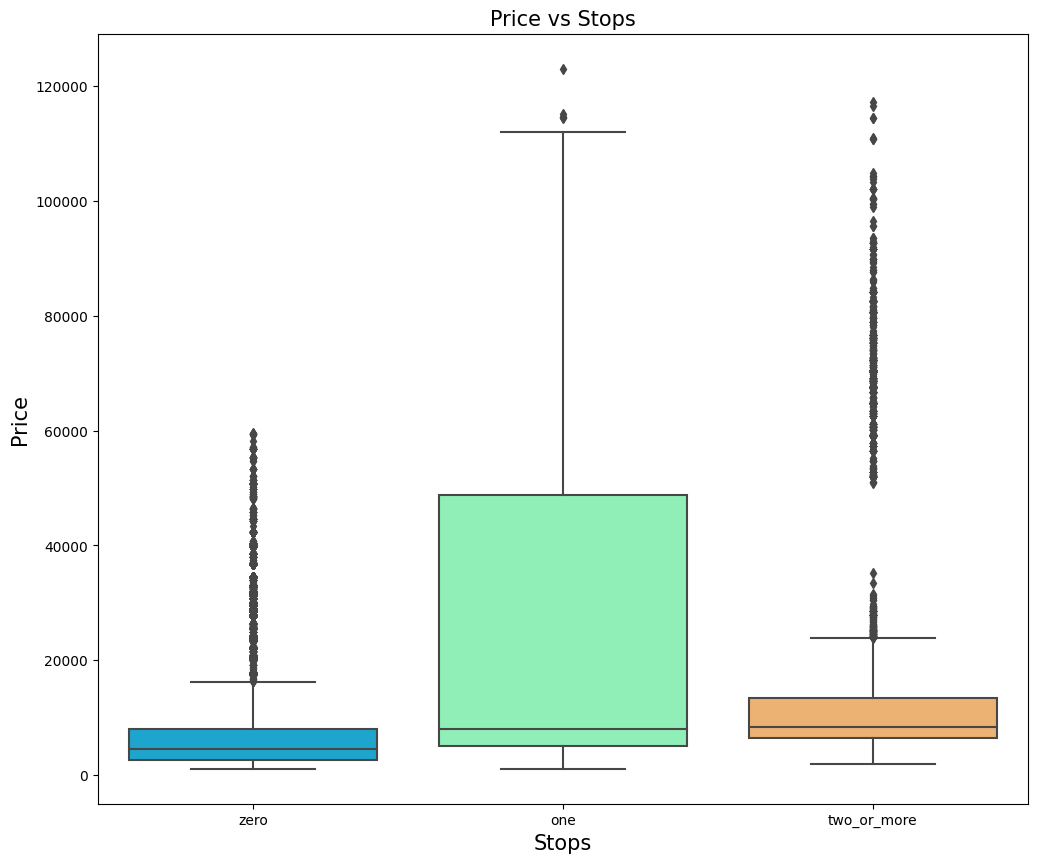

In [52]:
# price vary with number of stops of a flight
plt.figure(figsize=(12,10))
sns.boxplot(x='stops',y='price',data=df, palette='rainbow')
plt.title('Price vs Stops',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

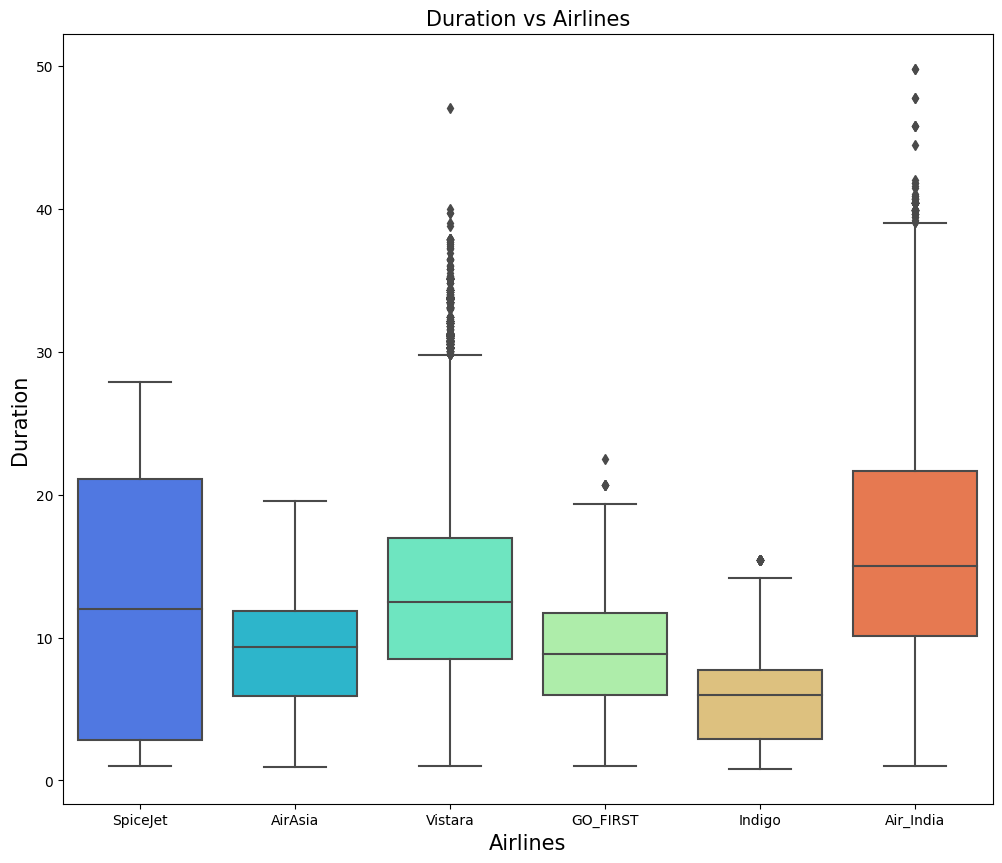

In [53]:
# price vary with different airlines
plt.figure(figsize=(12,10))
sns.boxplot(x='airline',y='duration',data=df, palette='rainbow')
plt.title('Duration vs Airlines',fontsize=15)
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Duration',fontsize=15)
plt.show()


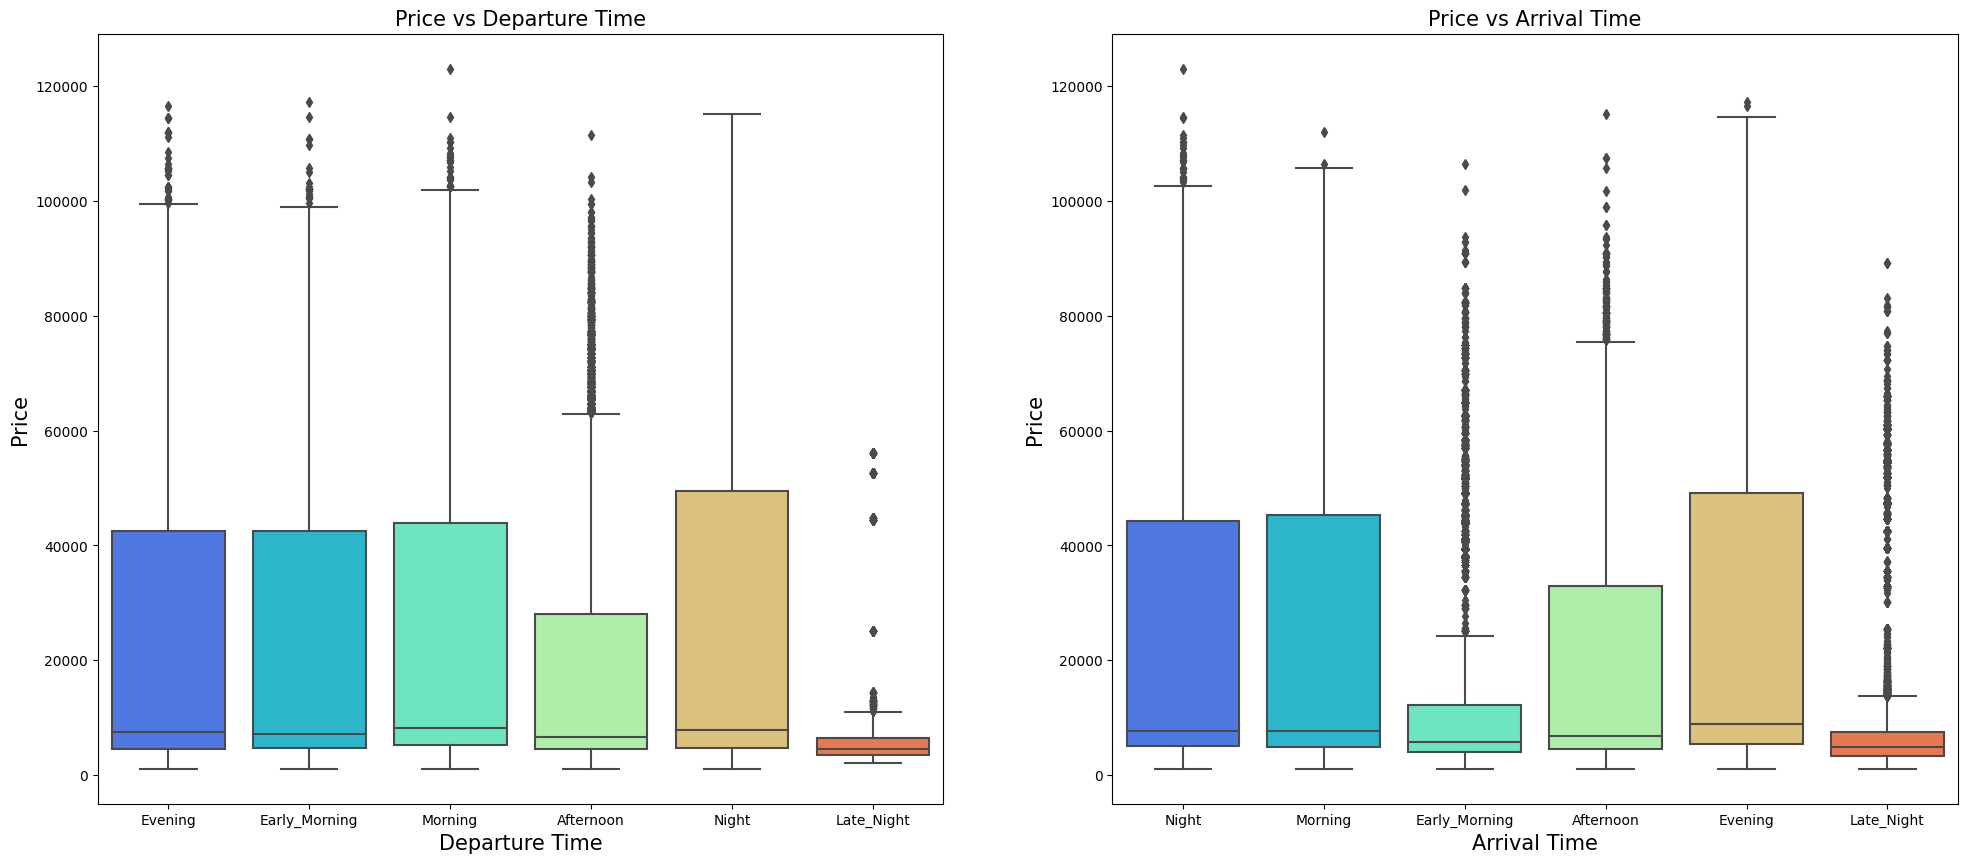

In [58]:
# price vary with different Departure time and Arrival time
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df, palette='rainbow')
plt.title('Price vs Departure Time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df, palette='rainbow')
plt.title('Price vs Arrival Time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()